# Regularization

In [13]:
# Imports and display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

import seaborn as sns
from seaborn import plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import pickle

pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 20

%matplotlib inline

In [14]:
with open("first_games.pkl", 'rb') as picklefile:
   first_games = pickle.load(picklefile)

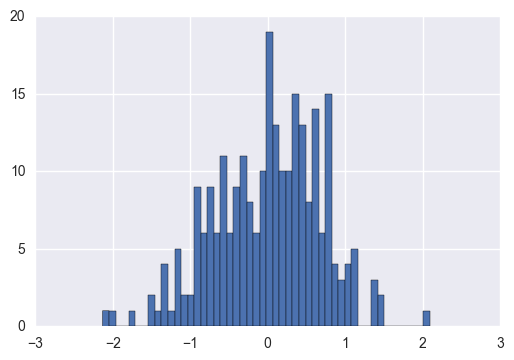

In [15]:
# Make a column for log wl_ratio because then it'll be normalized
first_games['log_avg_wl'] = np.log(first_games.avg_wl_ratio)

# Check if that had a normal distribution
first_games.log_avg_wl.hist(bins = 50);

In [16]:
# Drop columns that will not be used in the model
first_games = first_games.drop('team', 1)
first_games = first_games.drop('season', 1)
first_games = first_games.drop('avg_wl_ratio', 1)
first_games = first_games.drop('avg_points', 1)
first_games = first_games.drop('avg_salary', 1)

In [17]:
# Normalize the team_stats dataframe between 0 and 1 (between -1 and 1 would be team_stats.mean()/ same as below)
first_norm = (first_games - first_games.min()) / (first_games.max() - first_games.min())

first_norm.head(3)

,avg_fg_att,avg_fg_pct,avg_fg3_pct,avg_opp_fg_pct,avg_opp_fg3_pct,avg_opp_fg_att,avg_age,avg_per,strong_link,weak_link,log_avg_wl
0,0.63,0.32,0.47,0.41,0.25,0.76,0.48,0.57,0.31,0.49,0.57
1,0.50,0.53,0.42,0.82,0.55,0.30,0.43,0.65,0.19,0.67,0.65
2,0.40,0.63,0.34,0.75,0.67,0.32,0.55,0.64,0.22,0.61,0.54


In [18]:
y_team=first_norm['log_avg_wl']
X_team=first_norm.drop(['log_avg_wl'],1)

In [19]:
X_team.shape
y_team.shape

(256,)

In [20]:
lr=LinearRegression()

xtrain, xtest, ytrain, ytest = train_test_split(X_team, y_team, test_size=0.3)

lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.18338740596000458

In [21]:
rcv = RidgeCV(cv=5)
rcv.fit(xtrain, ytrain)
rcv.score(xtest, ytest)

0.2194026054823881

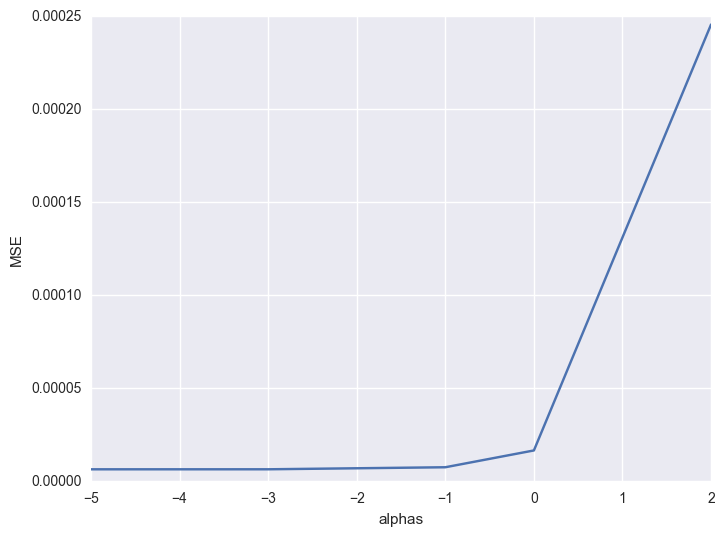

In [25]:
# Test, train, split option via Ridge 
alphas=[1e-5,1e-3,1e-1,1,100]
X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size=0.3)

def make_estimator(est,alpha):
    est.alpha=alpha
    model = est.fit(X_train,y_train)
    mse=np.mean(y_test-model.predict(X_test))**2
    return mse
    
# Get scores
all_mse=[]    
for a in alphas:    
    all_mse.append(make_estimator(Ridge(),a))
    

#plot of model
plt.figure(figsize=(8,6))
plt.legend()
plt.plot(np.log10(alphas),all_mse)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()